# Part 12: Calculate the angle differences between each vertex
michael babb  
2025 09 18

In [1]:
# standard
import os
from collections import Counter

In [2]:
# external
import geopandas as gpd
import math
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [3]:
# custom
import run_constants as rc
from geo_data_io.fc_df_spatial import write_gdf 
from geo_data_io.geo_operations import calculate_initial_compass_bearing, points2distance
from geo_data_io.df_operations import into_dict
#from utils import *

# load the street network data

In [6]:
fpn = os.path.join(rc.OUTPUT_FILE_PATH, rc.S05_MISSING_IN_FILE_NAME)

In [7]:
gdf = gpd.read_file(filename = fpn)

In [8]:
gdf.columns

Index(['snd_id', 'ord_street_name', 'ord_street_type', 'ord_stname_type',
       'ord_stname_concat', 'ord_stname_unique', 'ord_stname_type_group',
       'ord_street_type_rank', 'snd_group', 'group_id', 'city_sector',
       'city_sector_group', 'street_status', 'sn_id', 'en_id', 'dist',
       'dist_miles', 'geometry'],
      dtype='object')

In [9]:
gdf.shape

(29776, 18)

In [10]:
gdf['n_segments'] = int(1)

In [ ]:
# add text descriptions for the street type categories


In [ ]:
# add text descriptions for the street type categories
gdf['street_status_desc'] = gdf['street_status'].map(rc.street_status_dict)

In [13]:
# number of segments
gdf['street_status_desc'].value_counts()

street_status_desc
discontinuous_street           21938
continuous_street               3812
added_street: within-sector     3616
added_street: cross-sector       410
Name: count, dtype: int64

In [14]:
# which street name columns feature ''?
gdf.columns

Index(['snd_id', 'ord_street_name', 'ord_street_type', 'ord_stname_type',
       'ord_stname_concat', 'ord_stname_unique', 'ord_stname_type_group',
       'ord_street_type_rank', 'snd_group', 'group_id', 'city_sector',
       'city_sector_group', 'street_status', 'sn_id', 'en_id', 'dist',
       'dist_miles', 'geometry', 'n_segments', 'street_status_desc'],
      dtype='object')

In [15]:
'' in gdf['ord_stname_concat'].unique().tolist()


False

In [16]:
'' in gdf['ord_stname_unique'].unique().tolist()

False

In [17]:
check_df = gdf.loc[(gdf['ord_stname_unique'] == '') &
                (gdf['street_status'] == 2), :]

# q1: pick one segment - GALER
see if we can plot the polar coordinates of each vertex  
michael babb  
2025 10 01


In [19]:
gdf.columns

Index(['snd_id', 'ord_street_name', 'ord_street_type', 'ord_stname_type',
       'ord_stname_concat', 'ord_stname_unique', 'ord_stname_type_group',
       'ord_street_type_rank', 'snd_group', 'group_id', 'city_sector',
       'city_sector_group', 'street_status', 'sn_id', 'en_id', 'dist',
       'dist_miles', 'geometry', 'n_segments', 'street_status_desc'],
      dtype='object')

In [20]:
tgdf = gdf.loc[gdf['ord_stname_type_group'].str.find('GALER ST') > -1, :].copy()
tgdf.shape

(82, 20)

In [21]:
tgdf.head()

,snd_id,ord_street_name,ord_street_type,ord_stname_type,ord_stname_concat,ord_stname_unique,ord_stname_type_group,ord_street_type_rank,snd_group,group_id,city_sector,city_sector_group,street_status,sn_id,en_id,dist,dist_miles,geometry,n_segments,street_status_desc
20870,68572,GALER,ST,GALER ST,W GALER ST,W GALER ST,GALER ST W_CNTR_E,10_ST,0,1,W,W_CNTR_E,2,10270,10272,492.611742,0.093298,"LINESTRING (-122.39628 47.63228, -122.39428 47...",1,added_street: within-sector
20871,68573,GALER,ST,GALER ST,W GALER ST,W GALER ST,GALER ST W_CNTR_E,10_ST,1,1,W,W_CNTR_E,2,10276,10364,3244.800059,0.614545,"LINESTRING (-122.39091 47.63233, -122.37776 47...",1,added_street: within-sector
20872,68574,GALER,ST,GALER ST,W GALER ST,W GALER ST,GALER ST W_CNTR_E,10_ST,2,1,W,W_CNTR_E,2,10296,10297,169.665188,0.032134,"LINESTRING (-122.36909 47.63232, -122.3684 47....",1,added_street: within-sector
20873,68575,GALER,ST,GALER ST,W GALER ST,W GALER ST,GALER ST W_CNTR_E,10_ST,3,1,W,W_CNTR_E,2,10284,10290,714.801685,0.135379,"LINESTRING (-122.37462 47.63232, -122.37171 47...",1,added_street: within-sector
20874,68576,GALER,ST,GALER ST,W GALER ST,W GALER ST,GALER ST W_CNTR_E,10_ST,4,1,W,W_CNTR_E,2,10299,10303,285.366292,0.054047,"LINESTRING (-122.36764 47.63232, -122.36648 47...",1,added_street: within-sector


In [22]:
tgdf.columns

Index(['snd_id', 'ord_street_name', 'ord_street_type', 'ord_stname_type',
       'ord_stname_concat', 'ord_stname_unique', 'ord_stname_type_group',
       'ord_street_type_rank', 'snd_group', 'group_id', 'city_sector',
       'city_sector_group', 'street_status', 'sn_id', 'en_id', 'dist',
       'dist_miles', 'geometry', 'n_segments', 'street_status_desc'],
      dtype='object')

In [23]:
id_col_names = ['snd_id', 'ord_street_name', 'ord_street_type', 'ord_stname_type',
       'ord_stname_concat', 'ord_stname_unique', 'ord_stname_type_group',
       'ord_street_type_rank', 'snd_group', 'group_id', 'city_sector',
       'city_sector_group', 'street_status','street_status_desc']
len(id_col_names)

14

In [28]:
# close, but not quite
# make a graph!
my_graph = nx.Graph()
point_list = []
n_coords_counter = Counter()

test_list = []

node_coord_dict = {}

node_angle_list = []

for i_row, row in tgdf.iterrows():    
    line_geom = row['geometry']
    line_vertices = line_geom.coords
    n_vertices = len(line_vertices)
    n_coords_counter[n_vertices] += 1

    id_col_value_list = []    
    for icn in id_col_names:
        id_col_value_list.append(row[icn])    
    
    node_id_list = []
    for i_lv, lv in enumerate(line_vertices): 
        
        if i_lv == 0:
            # use the starting node id
            node_id = str(row['sn_id']) + '-' + str(0).zfill(3)
        elif i_lv == n_vertices - 1:
            # use the ending node id
            node_id = str(row['en_id']) + '-' + str(0).zfill(3)
        else:
            node_id = str(row['snd_id']) + '-' + str(i_lv).zfill(3)

        node_id_list.append(node_id)        

        curr_point_list = id_col_value_list[:]    
        curr_point_list.append(node_id)
        curr_point_list.append(i_lv)
        curr_point_list.append(lv)        
        
        # add to the total output list
        point_list.append(curr_point_list)

        node_coord_dict[node_id] = lv

    # add these interim points to the graph
    ex_line_segment_df = []
    for i_node_id, curr_node_id in enumerate(node_id_list[:-1]):
        next_node_id = node_id_list[i_node_id + 1]
        my_graph.add_edge(u_of_edge=curr_node_id,
                          v_of_edge=next_node_id)
        
        # get the coords
        curr_node_coords = node_coord_dict[curr_node_id]
        next_node_coords = node_coord_dict[next_node_id]
        
        node_angle = calculate_initial_compass_bearing(point_a=curr_node_coords,
                                                   point_b=next_node_coords)
        seg_dist = points2distance(start = curr_node_coords, end=next_node_coords, unit='miles') * 5280
        
        temp_list = [curr_node_id, next_node_id, seg_dist, node_angle]
        temp_list.extend(id_col_value_list)    
        node_angle_list.append(temp_list)


# okay, now, let's build a gdf
new_col_names = id_col_names[:]
new_col_names.extend(['node_id', 'vertex_id', 'geometry'])
vertex_df = pd.DataFrame(data = point_list, 
                          columns=new_col_names)
print(vertex_df.shape)

node_id_dict = into_dict(df = vertex_df, key_fn = 'node_id')
new_col_names = ['sn_id', 'en_id', 'seg_dist', 'node_angle']
new_col_names.extend(id_col_names)
ex_line_df = pd.DataFrame(data = node_angle_list,
                          columns = new_col_names)

(266, 17)


In [29]:
ex_line_df.head()

,sn_id,en_id,seg_dist,node_angle,snd_id,ord_street_name,ord_street_type,ord_stname_type,ord_stname_concat,ord_stname_unique,ord_stname_type_group,ord_street_type_rank,snd_group,group_id,city_sector,city_sector_group,street_status,street_status_desc
0,10270-000,10272-000,492.611742,89.234013,68572,GALER,ST,GALER ST,W GALER ST,W GALER ST,GALER ST W_CNTR_E,10_ST,0,1,W,W_CNTR_E,2,added_street: within-sector
1,10276-000,10364-000,3244.800059,94.918830,68573,GALER,ST,GALER ST,W GALER ST,W GALER ST,GALER ST W_CNTR_E,10_ST,1,1,W,W_CNTR_E,2,added_street: within-sector
2,10296-000,10297-000,169.665188,89.992467,68574,GALER,ST,GALER ST,W GALER ST,W GALER ST,GALER ST W_CNTR_E,10_ST,2,1,W,W_CNTR_E,2,added_street: within-sector
3,10284-000,10290-000,714.801685,89.946516,68575,GALER,ST,GALER ST,W GALER ST,W GALER ST,GALER ST W_CNTR_E,10_ST,3,1,W,W_CNTR_E,2,added_street: within-sector
4,10299-000,10303-000,285.366292,89.962376,68576,GALER,ST,GALER ST,W GALER ST,W GALER ST,GALER ST W_CNTR_E,10_ST,4,1,W,W_CNTR_E,2,added_street: within-sector


In [30]:
vertex_df['node_id'].value_counts()

node_id
10270-000    2
10292-000    2
10330-000    2
10331-000    2
10332-000    2
            ..
17827-049    1
17827-050    1
17827-051    1
17827-052    1
10439-000    1
Name: count, Length: 185, dtype: int64

In [41]:
ex_line_df['seg_dist_normalized'] = 1
ex_line_df['theta'] = ex_line_df['node_angle'].map(math.radians)

In [42]:
ex_line_df.head()

,sn_id,en_id,seg_dist,node_angle,snd_id,ord_street_name,ord_street_type,ord_stname_type,ord_stname_concat,ord_stname_unique,...,ord_street_type_rank,snd_group,group_id,city_sector,city_sector_group,street_status,street_status_desc,seg_dist_normalized,radians,theta
0,10270-000,10272-000,492.611742,89.234013,68572,GALER,ST,GALER ST,W GALER ST,W GALER ST,...,10_ST,0,1,W,W_CNTR_E,2,added_street: within-sector,1,1.557427,1.557427
1,10276-000,10364-000,3244.800059,94.918830,68573,GALER,ST,GALER ST,W GALER ST,W GALER ST,...,10_ST,1,1,W,W_CNTR_E,2,added_street: within-sector,1,1.656646,1.656646
2,10296-000,10297-000,169.665188,89.992467,68574,GALER,ST,GALER ST,W GALER ST,W GALER ST,...,10_ST,2,1,W,W_CNTR_E,2,added_street: within-sector,1,1.570665,1.570665
3,10284-000,10290-000,714.801685,89.946516,68575,GALER,ST,GALER ST,W GALER ST,W GALER ST,...,10_ST,3,1,W,W_CNTR_E,2,added_street: within-sector,1,1.569863,1.569863
4,10299-000,10303-000,285.366292,89.962376,68576,GALER,ST,GALER ST,W GALER ST,W GALER ST,...,10_ST,4,1,W,W_CNTR_E,2,added_street: within-sector,1,1.570140,1.570140


In [43]:
ex_line_df['theta'].describe()

count    184.000000
mean       3.623780
std        1.713006
min        0.153852
25%        1.578559
50%        4.711670
75%        5.140996
max        5.547620
Name: theta, dtype: float64

In [45]:
ex_line_df['seg_dist_normalized'].describe()

count    184.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: seg_dist_normalized, dtype: float64

In [70]:
color_dict = {
0: "#33a02c",
1: "#000000",
2: "#ca0020",
3: "#1a4bed"}

In [74]:
ex_line_df['line_color'] = ex_line_df['street_status'].map(color_dict)
ex_line_df['line_dist'] = ex_line_df['street_status'] / 3

In [75]:
ex_line_df['street_status'].value_counts()


street_status
1    167
2     15
3      2
Name: count, dtype: int64

In [77]:
ex_line_df.loc[ex_line_df['street_status']==3, ].head()

,sn_id,en_id,seg_dist,node_angle,snd_id,ord_street_name,ord_street_type,ord_stname_type,ord_stname_concat,ord_stname_unique,...,group_id,city_sector,city_sector_group,street_status,street_status_desc,seg_dist_normalized,radians,theta,line_color,line_dist
5,10324-000,10326-000,170.585456,89.976208,68577,GALER,ST,GALER ST,GALER ST W_CNTR_E,GALER ST W_CNTR_E,...,1,CNTR_E_W,W_CNTR_E,3,added_street: cross-sector,1,1.570381,1.570381,#1a4bed,1.0
13,10353-000,10363-000,3583.517380,91.031324,68585,GALER,ST,GALER ST,GALER ST W_CNTR_E,GALER ST W_CNTR_E,...,1,CNTR_E_W,W_CNTR_E,3,added_street: cross-sector,1,1.588796,1.588796,#1a4bed,1.0


C:\Users\babbm\AppData\Local\Temp\ipykernel_2508\3404783067.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])


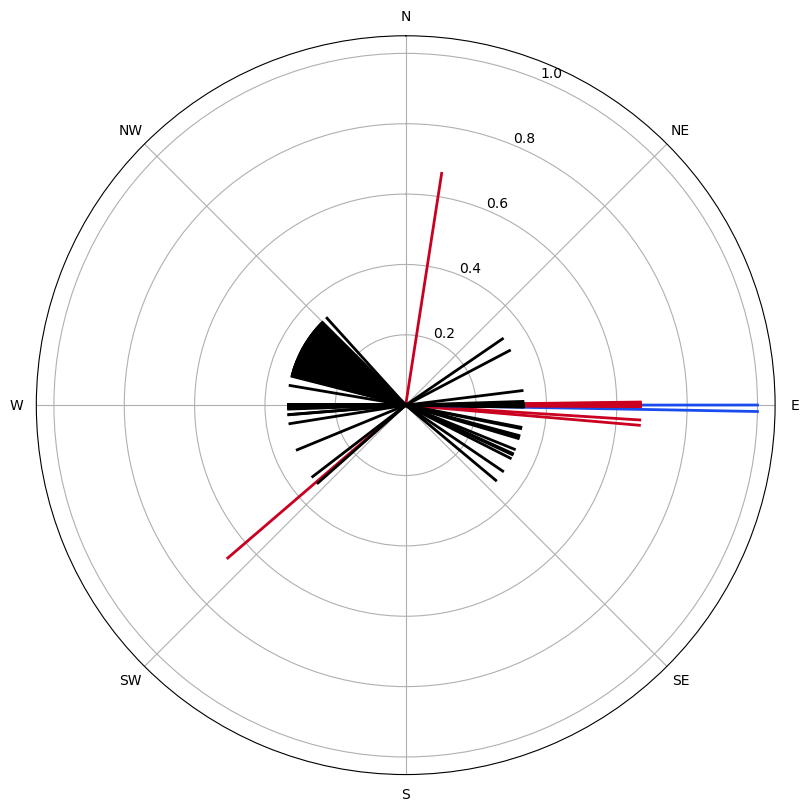

In [79]:
fig, axs = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'},
                        layout='constrained')

axs.set_theta_zero_location('N')  # Set zero to North
axs.set_theta_direction(-1)  # Reverse the rotation
axs.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

for i_row, row in ex_line_df.iterrows():
    #axs.plot(row['theta'], row['seg_dist_normalized'], 'g.')
    #ax.plot((0, w[0]), (0, w[1]), color=w[2], linewidth=2, zorder=3)
    axs.plot((0, row['theta']), (0, row['line_dist']), color=row['line_color'], linewidth=2)

plt.show()

# end